In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (10, 7)

In [14]:
data = pd.read_csv('/home/jvdzwaan/data/dilipad/MP/opinion_word_perplexity_100.csv', index_col=0)
data

,Balkenende I-CDA,Balkenende I-ChristenUnie,Balkenende I-D66,Balkenende I-GroenLinks,Balkenende I-LPF,Balkenende I-PvdA,Balkenende I-SGP,Balkenende I-SP,Balkenende I-VVD,Balkenende II-CDA,...,Rutte I-CDA,Rutte I-ChristenUnie,Rutte I-D66,Rutte I-GroenLinks,Rutte I-PVV,Rutte I-PvdA,Rutte I-PvdD,Rutte I-SGP,Rutte I-SP,Rutte I-VVD
22110_2006.txt,2159.429540,3168.426156,2577.074093,1838.162429,2605.876308,1843.942827,3295.281653,2333.534997,2422.100174,1261.088053,...,1383.198124,1541.412573,1424.870470,1217.835883,1604.365258,1278.073085,2714.890931,2195.707198,1313.568578,1334.928701
22110_2010.txt,2150.481396,2972.811159,2502.445384,1885.602881,2695.532606,1921.037541,3161.789932,2480.259540,2519.395065,1316.041279,...,1305.289361,1512.979376,1280.785380,1143.456718,1665.534536,1244.778785,2460.946778,2146.837998,1335.134921,1311.492653
22110_2012.txt,2180.180414,3059.124104,2556.185095,1945.618222,2770.296379,2052.805375,3159.862790,2577.222332,2463.032400,1359.222831,...,1283.733004,1490.491545,1301.924045,1133.905580,1685.618576,1242.021594,2421.332841,2108.837816,1378.202608,1305.457328
22220_2006.txt,2142.828828,3195.512428,2576.440423,2164.946353,2673.810865,2103.390818,3394.951739,2306.667539,2449.688993,1407.762415,...,1633.209780,1782.519287,1662.445985,1569.847044,1806.229915,1447.683705,3203.084768,2382.378870,1438.639610,1583.985039
22220_2010.txt,1966.521702,2891.173880,2309.458476,1744.394518,2412.750673,1822.084791,3030.648648,2001.391900,2192.164497,1134.442139,...,1226.980014,1335.358605,1293.168281,1134.558680,1478.977762,1093.837477,2734.200367,1911.917749,1045.199357,1158.572741
22220_2012.txt,1961.610572,3044.759639,2413.187421,1855.112771,2498.916582,1904.159933,3219.075534,2248.497851,2164.013034,1191.658818,...,1224.981780,1385.909451,1259.949413,1169.768711,1480.542632,1110.254297,2702.386244,1975.512579,1080.453395,1166.842101
22320_2006.txt,2017.827948,3181.841449,2566.785442,2055.348932,2536.339446,1993.665839,3284.220703,2434.111907,2328.944496,1338.372701,...,1415.576935,1640.030375,1512.111073,1409.420559,1704.904536,1391.281961,3089.652049,2187.164713,1481.258704,1396.121031
22320_2010.txt,1927.263234,3058.263667,2522.141980,1998.618587,2589.451158,1908.383523,2996.033277,2549.233907,2251.433540,1200.210441,...,1321.292428,1506.480592,1410.679671,1377.995709,1704.034993,1254.477523,3012.434339,1961.687094,1442.160463,1321.657408
22320_2012.txt,1987.739880,2960.684170,2501.874842,1973.359143,2598.078258,1881.280763,3082.776295,2443.773864,2328.003505,1237.963333,...,1256.361319,1421.100937,1292.716666,1254.320364,1562.674863,1171.578002,2795.018155,1972.552689,1331.436253,1235.131523
22330_2006.txt,2098.306703,3054.800219,2560.293267,2191.847219,2749.854099,2175.716717,3120.318702,2670.080371,2328.853794,1378.559628,...,1544.076718,1717.423656,1601.340841,1531.145032,1953.525735,1498.660945,2994.555237,2201.275177,1662.987392,1511.962873


In [15]:
md = pd.read_csv('/home/jvdzwaan/data/dilipad/MP/metadata.csv', index_col=0, encoding='utf-8')
metadata = md.drop_duplicates()
print metadata['party_id'].values
print metadata['party_nl'].values
party_metadata = pd.DataFrame(metadata['party_nl'].values, index=metadata['party_id'].values, columns=['party_nl'])
#metadata.reindex(index=['party_id'], columns=['party_nl'])
party_metadata

[22110 22220 22320 22330 22420 22521 22526 22722 22951 22952 22953]
[u'GroenLinks' u'SP' u'PvdA' u'D66' u'VVD' u'CDA' u'ChristenUnie' u'PVV'
 u'PvdD' u'SGP' u'50Plus']


,party_nl
22110,GroenLinks
22220,SP
22320,PvdA
22330,D66
22420,VVD
22521,CDA
22526,ChristenUnie
22722,PVV
22951,PvdD
22952,SGP


In [4]:
d = {'prev': ['Balkenende III', 'Balkenende IV', 'Rutte I'],
     'next': ['Balkenende IV', 'Rutte I', 'Rutte II']}
cabinet_metadata = pd.DataFrame(data=d, index=[2006, 2010, 2012])
cabinet_metadata

,next,prev
2006,Balkenende IV,Balkenende III
2010,Rutte I,Balkenende IV
2012,Rutte II,Rutte I


In [5]:
data.T.idxmin()

22110_2006.txt    Balkenende II-GroenLinks
22110_2010.txt    Balkenende IV-GroenLinks
22110_2012.txt          Rutte I-GroenLinks
22220_2006.txt            Balkenende II-SP
22220_2010.txt            Balkenende IV-SP
22220_2012.txt            Balkenende IV-SP
22320_2006.txt          Balkenende IV-PvdA
22320_2010.txt          Balkenende IV-PvdA
22320_2012.txt          Balkenende IV-PvdA
22330_2006.txt           Balkenende IV-CDA
22330_2010.txt          Balkenende IV-PvdA
22330_2012.txt          Balkenende IV-PvdA
22420_2006.txt          Balkenende IV-PvdA
22420_2010.txt           Balkenende IV-VVD
22420_2012.txt           Balkenende IV-CDA
22521_2006.txt           Balkenende IV-CDA
22521_2010.txt           Balkenende IV-CDA
22521_2012.txt           Balkenende IV-CDA
22526_2006.txt           Balkenende IV-CDA
22526_2010.txt           Balkenende IV-CDA
22526_2012.txt           Balkenende IV-CDA
22722_2006.txt           Balkenende IV-PVV
22722_2010.txt           Balkenende IV-PVV
22722_2012.

In [16]:
def top10(row, n=10):
    #print list(row.sort_values(ascending=False).index[:10])
    return pd.Series(list(row.sort_values(ascending=True).index[:n]))

data[['top1', 'top2', 'top3']] = data.apply(lambda row: top10(row, n=3), axis=1)
#data

In [17]:
def get_party_id(row):
    r = str(row.name)
    r = r.replace('.txt', '')
    party_id, year = r.split('_')
    return party_id

def get_year(row):
    r = str(row.name)
    r = r.replace('.txt', '')
    party_id, year = r.split('_')
    return year

data['party_id'] = data.apply(lambda row: get_party_id(row), axis=1)
data['year'] = data.apply(lambda row: get_year(row), axis=1)
#data

In [19]:
data['metadata_party'] = data.apply(lambda row: party_metadata.loc[int(row['party_id'])]['party_nl'], axis=1)
data['metadata_cabinet_next'] = data.apply(lambda row: cabinet_metadata.loc[int(row['year'])]['next'], axis=1)
data['metadata_cabinet_prev'] = data.apply(lambda row: cabinet_metadata.loc[int(row['year'])]['prev'], axis=1)
data['label_next'] = data.apply(lambda row: '{}-{}'.format(row['metadata_cabinet_next'], row['metadata_party']), axis=1)
data['label_prev'] = data.apply(lambda row: '{}-{}'.format(row['metadata_cabinet_prev'], row['metadata_party']), axis=1)
data['party1'] = data.apply(lambda row: row['top1'].split('-')[1], axis=1)
data

,Balkenende I-CDA,Balkenende I-ChristenUnie,Balkenende I-D66,Balkenende I-GroenLinks,Balkenende I-LPF,Balkenende I-PvdA,Balkenende I-SGP,Balkenende I-SP,Balkenende I-VVD,Balkenende II-CDA,...,top2,top3,party_id,year,metadata_party,metadata_cabinet_next,metadata_cabinet_prev,label_next,label_prev,party1
22110_2006.txt,2159.429540,3168.426156,2577.074093,1838.162429,2605.876308,1843.942827,3295.281653,2333.534997,2422.100174,1261.088053,...,Balkenende IV-PvdA,Balkenende IV-SP,22110,2006,GroenLinks,Balkenende IV,Balkenende III,Balkenende IV-GroenLinks,Balkenende III-GroenLinks,GroenLinks
22110_2010.txt,2150.481396,2972.811159,2502.445384,1885.602881,2695.532606,1921.037541,3161.789932,2480.259540,2519.395065,1316.041279,...,Rutte I-GroenLinks,Balkenende IV-PvdA,22110,2010,GroenLinks,Rutte I,Balkenende IV,Rutte I-GroenLinks,Balkenende IV-GroenLinks,GroenLinks
22110_2012.txt,2180.180414,3059.124104,2556.185095,1945.618222,2770.296379,2052.805375,3159.862790,2577.222332,2463.032400,1359.222831,...,Balkenende IV-PvdA,Balkenende IV-CDA,22110,2012,GroenLinks,Rutte II,Rutte I,Rutte II-GroenLinks,Rutte I-GroenLinks,GroenLinks
22220_2006.txt,2142.828828,3195.512428,2576.440423,2164.946353,2673.810865,2103.390818,3394.951739,2306.667539,2449.688993,1407.762415,...,Balkenende IV-SP,Balkenende II-PvdA,22220,2006,SP,Balkenende IV,Balkenende III,Balkenende IV-SP,Balkenende III-SP,SP
22220_2010.txt,1966.521702,2891.173880,2309.458476,1744.394518,2412.750673,1822.084791,3030.648648,2001.391900,2192.164497,1134.442139,...,Balkenende II-SP,Balkenende IV-PvdA,22220,2010,SP,Rutte I,Balkenende IV,Rutte I-SP,Balkenende IV-SP,SP
22220_2012.txt,1961.610572,3044.759639,2413.187421,1855.112771,2498.916582,1904.159933,3219.075534,2248.497851,2164.013034,1191.658818,...,Balkenende IV-PvdA,Rutte I-SP,22220,2012,SP,Rutte II,Rutte I,Rutte II-SP,Rutte I-SP,SP
22320_2006.txt,2017.827948,3181.841449,2566.785442,2055.348932,2536.339446,1993.665839,3284.220703,2434.111907,2328.944496,1338.372701,...,Balkenende IV-SP,Balkenende II-PvdA,22320,2006,PvdA,Balkenende IV,Balkenende III,Balkenende IV-PvdA,Balkenende III-PvdA,PvdA
22320_2010.txt,1927.263234,3058.263667,2522.141980,1998.618587,2589.451158,1908.383523,2996.033277,2549.233907,2251.433540,1200.210441,...,Balkenende II-CDA,Balkenende II-PvdA,22320,2010,PvdA,Rutte I,Balkenende IV,Rutte I-PvdA,Balkenende IV-PvdA,PvdA
22320_2012.txt,1987.739880,2960.684170,2501.874842,1973.359143,2598.078258,1881.280763,3082.776295,2443.773864,2328.003505,1237.963333,...,Balkenende IV-CDA,Rutte I-PvdA,22320,2012,PvdA,Rutte II,Rutte I,Rutte II-PvdA,Rutte I-PvdA,PvdA
22330_2006.txt,2098.306703,3054.800219,2560.293267,2191.847219,2749.854099,2175.716717,3120.318702,2670.080371,2328.853794,1378.559628,...,Balkenende II-PvdA,Balkenende IV-PvdA,22330,2006,D66,Balkenende IV,Balkenende III,Balkenende IV-D66,Balkenende III-D66,CDA


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1287: UserWarning: findfont: Font family [u'monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


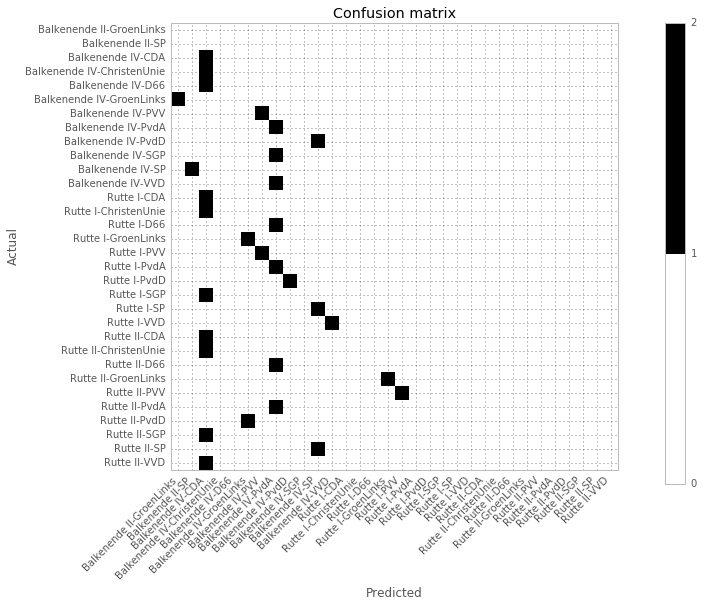

In [9]:
from pandas_confusion import ConfusionMatrix
cm = ConfusionMatrix(data['label_next'], data['top1'])
#cm.print_stats()
#print cm
cm.plot()

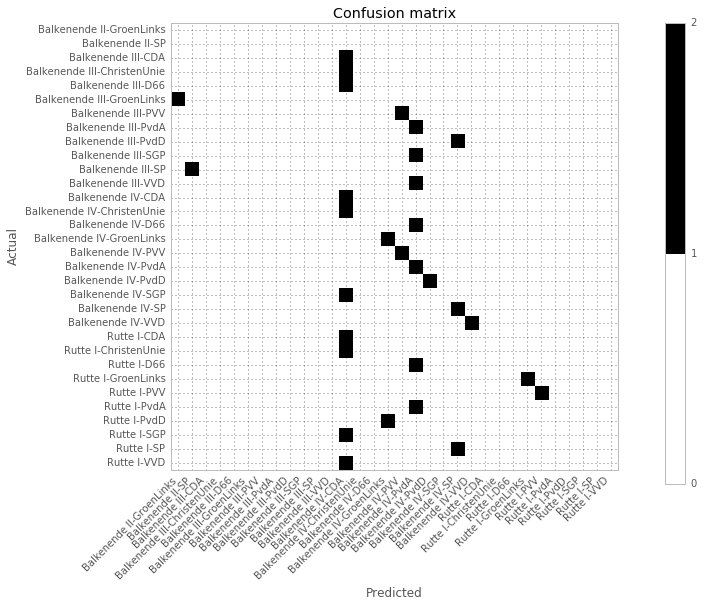

In [10]:
cm = ConfusionMatrix(data['label_prev'], data['top1'])
cm.plot()

Confusion Matrix:

Predicted     CDA  ChristenUnie  D66  GroenLinks  PVV  PvdA  PvdD  SGP  SP  \
Actual                                                                       
CDA             3             0    0           0    0     0     0    0   0   
ChristenUnie    3             0    0           0    0     0     0    0   0   
D66             1             0    0           0    0     2     0    0   0   
GroenLinks      0             0    0           3    0     0     0    0   0   
PVV             0             0    0           0    3     0     0    0   0   
PvdA            0             0    0           0    0     3     0    0   0   
PvdD            0             0    0           1    0     0     1    0   1   
SGP             2             0    0           0    0     1     0    0   0   
SP              0             0    0           0    0     0     0    0   3   
VVD             1             0    0           0    0     1     0    0   0   
__all__        10             0    0         

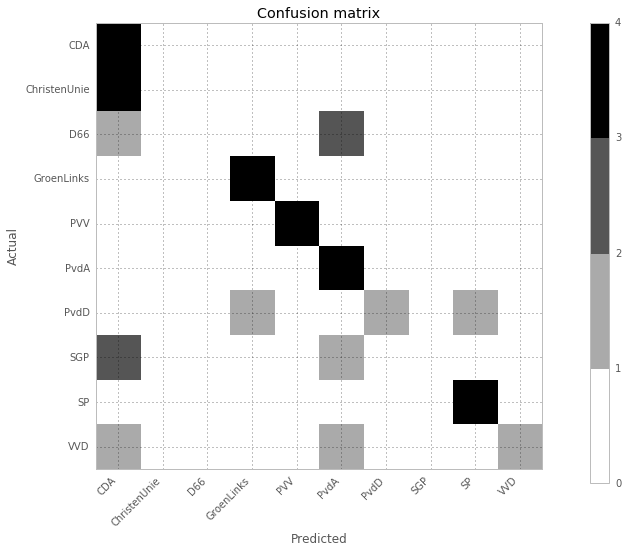

In [21]:
cm = ConfusionMatrix(data['metadata_party'], data['party1'])
cm.print_stats()
#print cm
cm.plot()

## Per document opinion word perplexity for parties

In [11]:
data = pd.read_csv('/home/jvdzwaan/data/dilipad/MP/opinion_word_perplexity_100_parties.csv', index_col=0)
data[['top1', 'top2', 'top3']] = data.apply(lambda row: top10(row, n=3), axis=1)
data['party_id'] = data.apply(lambda row: get_party_id(row), axis=1)
data['year'] = data.apply(lambda row: get_year(row), axis=1)
#data

In [12]:
#print party_metadata.loc[22110]['party_nl']
data['metadata_party'] = data.apply(lambda row: party_metadata.loc[int(row['party_id'])]['party_nl'], axis=1)
#data

Confusion Matrix:

Predicted     CDA  ChristenUnie  D66  GroenLinks  PVV  PvdA  PvdD  SGP  SP  \
Actual                                                                       
CDA             3             0    0           0    0     0     0    0   0   
ChristenUnie    3             0    0           0    0     0     0    0   0   
D66             0             0    0           0    0     3     0    0   0   
GroenLinks      0             0    0           3    0     0     0    0   0   
PVV             0             0    0           0    3     0     0    0   0   
PvdA            0             0    0           0    0     3     0    0   0   
PvdD            0             0    0           2    0     0     0    0   1   
SGP             0             0    0           0    0     0     0    3   0   
SP              0             0    0           0    0     0     0    0   3   
VVD             0             0    0           0    0     1     0    0   0   
__all__         6             0    0         

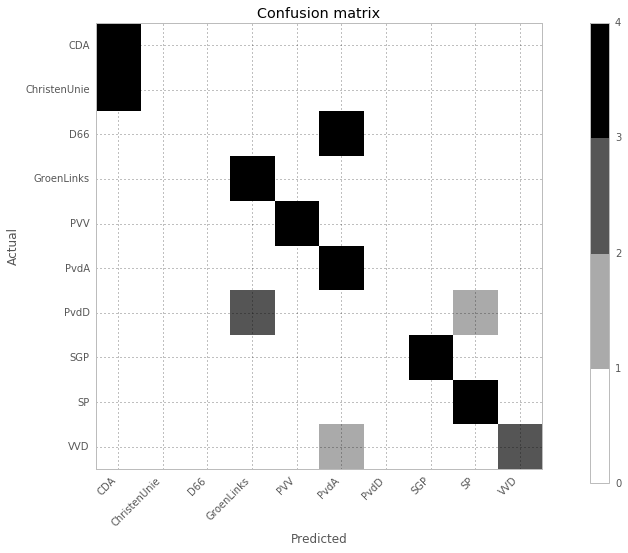

In [13]:
from pandas_confusion import ConfusionMatrix
cm = ConfusionMatrix(data['metadata_party'], data['top1'])
cm.print_stats()
cm.plot()